In [8]:
import os
import json
import h5py
import numpy as np

import robomimic
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.env_utils as EnvUtils
import robomimic.utils.obs_utils as ObsUtils
import imageio
import tqdm
from robomimic.utils.file_utils import create_hdf5_filter_key
import shutil

In [9]:
# dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/lift_carl_mix_v1_240.hdf5"
# dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/lift_carl_mix_v3_340.hdf5"
# dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/can_carl_mix_v3_510.hdf5"
# dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/square_expert_245.hdf5"

# dataset_path = "/home/ns1254/data_robomimic/carl_dataset/square_better_plus.hdf5"

# dataset_path = "/home/ns1254/data_robomimic/sawyer/dclose_10d_gb81.hdf5"
# dataset_path = "/home/ns1254/robomimic/datasets/can/paired/image+groups_v141.hdf5"
# dataset_path = "/home/ns1254/robomimic/datasets/can/mh/image_v141+groups.hdf5"
dataset_path = "/home/ns1254/robomimic/datasets/lift/mh/image_v141.hdf5"

dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/lift_carl_mix_v4_260.hdf5"

# dataset_path = "/home/ns1254/robomimic/datasets/can/paired/image+groups_v141.hdf5"

dataset_path = "/home/ns1254/data_robomimic/lift_image_real_robomimic.hdf5"

dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/square_carl_mix_v3_180.hdf5"
dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/square_expert_245.hdf5"

dataset_path = "/home/ns1254/data_robomimic/carl_dataset/mixed_human_original/square_carl_mix_v3_180.hdf5"

In [10]:
f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())

In [11]:
if 'env_args' in f['data'].attrs.keys():
    env_args =  f["data"].attrs["env_args"]
else:
    env_args= '{env_name: no-env-args}'
# env_args

In [12]:
lengths=[]
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  180
Max length:  1400
Min length:  123
Mean length:  513.0


In [13]:
# print all the attributes of the dataset

f.attrs.keys()

# f["data"].attrs["env_args"]

<KeysViewHDF5 []>

In [14]:
for key in f['mask'].keys():
    print(key, f['mask'][key])

bad <HDF5 dataset "bad": shape (20,), type "|S16">
expert <HDF5 dataset "expert": shape (100,), type "|S16">
intentional <HDF5 dataset "intentional": shape (20,), type "|S16">
other_task <HDF5 dataset "other_task": shape (20,), type "|S16">
p20b <HDF5 dataset "p20b": shape (100,), type "|S8">
p20i <HDF5 dataset "p20i": shape (100,), type "|S8">
p20o <HDF5 dataset "p20o": shape (100,), type "|S8">
p20tg <HDF5 dataset "p20tg": shape (100,), type "|S8">
try_good <HDF5 dataset "try_good": shape (20,), type "|S16">


In [15]:
# g60b40

In [9]:
demos_expert=[b.decode('utf-8') for b in f['mask']['expert']]
len(demos_expert), demos_expert[:3]

(210, ['demo_10', 'demo_100', 'demo_103'])

In [10]:
lengths_expert=[]
for demo_name in demos_expert:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths_expert.append(num_samples)

lengths_expert=np.array(lengths_expert)

print('Max length: ', np.max(lengths_expert))
print('Min length: ', np.min(lengths_expert))
print('Mean length: ', np.mean(lengths_expert))

Max length:  648
Min length:  318
Mean length:  446.0047619047619


In [9]:
f.keys()

<KeysViewHDF5 ['data', 'mask', 'maxs', 'mins']>

In [10]:
# Max length:  206
# Min length:  116
# Mean length:  139.51

In [11]:
mins=np.array( f['mins'] )
maxs=np.array( f['maxs'] )


np.set_printoptions(precision=3, suppress=True)

print(mins)
print(maxs)

[-0.75  -1.16  -5.689  0.     0.    -0.6   -1.   ]
[1.373 1.205 1.071 0.    0.    0.45  1.   ]


In [ ]:
# [-1.148 -1.427 -2.574  0.     0.    -0.6   -1.   ]
# [1.373 1.369 1.081 0.    0.    0.45  1.   ]

In [8]:
f.close()

In [10]:
demo=f['data'][demos[0]]
actions=demo['actions']
actions.shape

(66, 7)

In [11]:
actions[:,6]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [12]:
actions[:3,:]

array([[-0.01728681, -0.01287809,  0.02150786,  0.03470355, -0.08398321,
        -0.26471839,  1.        ],
       [-0.02903676, -0.03145326,  0.04185413,  0.03068078, -0.0828308 ,
        -0.27059845,  1.        ],
       [-0.045291  , -0.0456926 ,  0.05257651,  0.03653023, -0.08349406,
        -0.27933578,  1.        ]])

In [15]:
# goodbad=[name.decode('utf-8') for name in f['mask']['goodbad']]
goodbad=[name.decode('utf-8') for name in f['mask']['g100b25']]
goodbad[:10]

['demo_1',
 'demo_100',
 'demo_102',
 'demo_103',
 'demo_104',
 'demo_105',
 'demo_107',
 'demo_108',
 'demo_109',
 'demo_11']

In [16]:
len(goodbad), np.unique(goodbad, return_counts=True)[1].sum()

(125, 125)

In [17]:
lengths=[]
demos=goodbad
for demo_name in demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    lengths.append(num_samples)

lengths=np.array(lengths)

print('Number of demos: ', len(demos))
print('Max length: ', np.max(lengths))
print('Min length: ', np.min(lengths))
print('Mean length: ', np.mean(lengths))

Number of demos:  125
Max length:  696
Min length:  129
Mean length:  227.544


In [18]:
# choose top 30 demos by length from lengths

sorted_idx=np.argsort(lengths)[::-1]
sorted_demos=[demos[idx] for idx in sorted_idx]
sorted_lengths=[lengths[idx] for idx in sorted_idx]
sorted_lengths[:10]

[696, 683, 669, 633, 611, 608, 595, 595, 566, 554]

In [22]:
sorted_demos[20:30]

['demo_178',
 'demo_153',
 'demo_160',
 'demo_167',
 'demo_157',
 'demo_89',
 'demo_46',
 'demo_99',
 'demo_129',
 'demo_60']

In [20]:
sorted_demos[:25]

['demo_150',
 'demo_149',
 'demo_176',
 'demo_156',
 'demo_175',
 'demo_173',
 'demo_172',
 'demo_155',
 'demo_165',
 'demo_142',
 'demo_152',
 'demo_170',
 'demo_169',
 'demo_147',
 'demo_162',
 'demo_163',
 'demo_144',
 'demo_174',
 'demo_148',
 'demo_151',
 'demo_178',
 'demo_153',
 'demo_160',
 'demo_167',
 'demo_157']

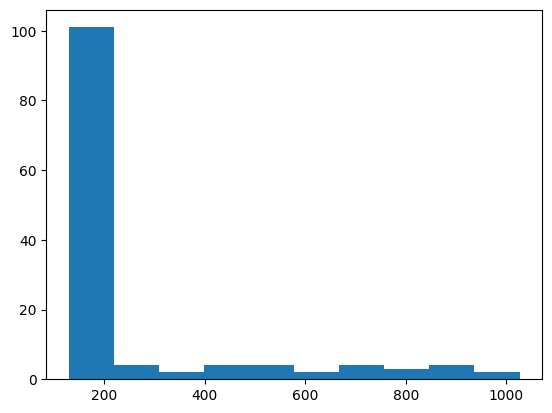

In [9]:
# plot histogram of lengths
import matplotlib.pyplot as plt
plt.hist(lengths, bins=10)
plt.show()

In [10]:
new_demos=[name.decode('utf-8') for name in f['mask']['new_demos']]
short_demos=[]
for demo_name in new_demos:
    demo=f['data'][demo_name]
    num_samples=demo.attrs['num_samples']
    if num_samples<700:
        short_demos.append(demo_name)

len(short_demos)

25

In [21]:
short_demos

['demo_142',
 'demo_144',
 'demo_147',
 'demo_148',
 'demo_149',
 'demo_150',
 'demo_151',
 'demo_152',
 'demo_153',
 'demo_155',
 'demo_156',
 'demo_157',
 'demo_160',
 'demo_162',
 'demo_163',
 'demo_165',
 'demo_167',
 'demo_169',
 'demo_170',
 'demo_172',
 'demo_173',
 'demo_174',
 'demo_175',
 'demo_176',
 'demo_178']

In [7]:
demo_name='demo_72'
action=f['data'][demo_name]['actions']
action=np.array(action)
np.min(action), np.max(action)

(-1.0, 1.0)

In [9]:
f['data'][demo_name].keys()

<KeysViewHDF5 ['actions', 'dones', 'next_obs', 'obs', 'rewards', 'states']>

In [10]:
f['data'][demo_name]['obs'].keys()

<KeysViewHDF5 ['agentview_image', 'object', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_vel_ang', 'robot0_eef_vel_lin', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>

In [11]:
f['data'][demo_name]['obs']['robot0_eye_in_hand_image'].shape

(168, 84, 84, 3)

In [13]:
f['data'][demo_name].attrs.keys()

<KeysViewHDF5 ['model_file', 'num_samples']>

In [16]:
mins=[]
maxs=[]
for demo_name in gp:
    action=f['data'][demo_name]['actions']
    action=np.array(action) 
    mins.append(np.min(action))
    maxs.append(np.max(action))


In [18]:
np.min(mins), np.max(maxs)

(-5.893424988008723, 1.0)

In [19]:
data=f['data'][demo_name]
data

<HDF5 group "/data/demo_73" (3 members)>

In [22]:
data['obs'].keys()

<KeysViewHDF5 ['robot0_eef_pos', 'robot0_eye_in_hand_image', 'robot0_joint_pos', 'robot0_joint_vel']>

In [25]:
v=data['obs']['robot0_joint_vel']
v=np.array(v)
np.min(v), np.max(v)

(-1.098, 0.256)

In [26]:
mins=[]
maxs=[]
for demo_name in gp:
    data=f['data'][demo_name]
    v=data['obs']['robot0_joint_vel']
    v=np.array(v)
    mins.append(np.min(v))
    maxs.append(np.max(v))

np.min(mins), np.max(maxs)

(-1.445, 0.889)

In [27]:
data = v
 
min_val = -1.5
max_val = 1.0
v_norm = 2 * ((data - min_val) / (max_val - min_val)) - 1

np.min(v_norm), np.max(v_norm)

(-0.6784000000000001, 0.40480000000000005)

In [34]:
gs=[b.decode('utf-8') for b in f['mask']["c1_i40"] ]
gs[-40:]

['demo_300',
 'demo_301',
 'demo_302',
 'demo_303',
 'demo_304',
 'demo_305',
 'demo_306',
 'demo_307',
 'demo_308',
 'demo_309',
 'demo_310',
 'demo_311',
 'demo_312',
 'demo_313',
 'demo_314',
 'demo_315',
 'demo_316',
 'demo_317',
 'demo_318',
 'demo_319',
 'demo_320',
 'demo_321',
 'demo_322',
 'demo_323',
 'demo_324',
 'demo_325',
 'demo_326',
 'demo_327',
 'demo_328',
 'demo_329',
 'demo_330',
 'demo_331',
 'demo_332',
 'demo_333',
 'demo_334',
 'demo_335',
 'demo_336',
 'demo_337',
 'demo_338',
 'demo_339']

In [37]:
gi=[b.decode('utf-8') for b in f['mask']["c2_i40"] ]
gi[-40:]

['demo_200',
 'demo_201',
 'demo_202',
 'demo_203',
 'demo_204',
 'demo_205',
 'demo_206',
 'demo_207',
 'demo_208',
 'demo_209',
 'demo_210',
 'demo_211',
 'demo_212',
 'demo_213',
 'demo_214',
 'demo_215',
 'demo_216',
 'demo_217',
 'demo_218',
 'demo_219',
 'demo_220',
 'demo_221',
 'demo_222',
 'demo_223',
 'demo_224',
 'demo_225',
 'demo_226',
 'demo_227',
 'demo_228',
 'demo_229',
 'demo_230',
 'demo_231',
 'demo_232',
 'demo_233',
 'demo_234',
 'demo_235',
 'demo_236',
 'demo_237',
 'demo_238',
 'demo_239']

In [38]:
gf=[b.decode('utf-8') for b in f['mask']["c3_i40"] ]
gf[-40:]

['demo_389',
 'demo_390',
 'demo_391',
 'demo_392',
 'demo_393',
 'demo_394',
 'demo_395',
 'demo_396',
 'demo_397',
 'demo_398',
 'demo_399',
 'demo_400',
 'demo_401',
 'demo_402',
 'demo_403',
 'demo_404',
 'demo_405',
 'demo_406',
 'demo_407',
 'demo_408',
 'demo_409',
 'demo_410',
 'demo_411',
 'demo_412',
 'demo_413',
 'demo_414',
 'demo_415',
 'demo_416',
 'demo_417',
 'demo_418',
 'demo_419',
 'demo_420',
 'demo_421',
 'demo_422',
 'demo_423',
 'demo_424',
 'demo_425',
 'demo_426',
 'demo_427',
 'demo_428']

In [39]:
go=[b.decode('utf-8') for b in f['mask']["c4_i40"] ]
go[-40:]

['demo_347',
 'demo_348',
 'demo_349',
 'demo_350',
 'demo_351',
 'demo_352',
 'demo_353',
 'demo_354',
 'demo_355',
 'demo_356',
 'demo_357',
 'demo_358',
 'demo_359',
 'demo_360',
 'demo_361',
 'demo_362',
 'demo_363',
 'demo_364',
 'demo_365',
 'demo_366',
 'demo_367',
 'demo_368',
 'demo_369',
 'demo_370',
 'demo_371',
 'demo_372',
 'demo_373',
 'demo_374',
 'demo_375',
 'demo_376',
 'demo_377',
 'demo_378',
 'demo_379',
 'demo_380',
 'demo_381',
 'demo_382',
 'demo_383',
 'demo_384',
 'demo_385',
 'demo_386']

In [27]:
short1=[b.decode('utf-8') for b in f['mask']["short2"] ]
short2=[b.decode('utf-8') for b in f['mask']["short3"] ]

short1, short2

(['demo_300',
  'demo_301',
  'demo_302',
  'demo_303',
  'demo_304',
  'demo_305',
  'demo_306',
  'demo_307',
  'demo_308',
  'demo_309',
  'demo_310',
  'demo_311',
  'demo_312',
  'demo_313',
  'demo_314',
  'demo_315',
  'demo_316',
  'demo_317',
  'demo_318',
  'demo_319'],
 ['demo_320',
  'demo_321',
  'demo_322',
  'demo_323',
  'demo_324',
  'demo_325',
  'demo_326',
  'demo_327',
  'demo_328',
  'demo_329',
  'demo_330',
  'demo_331',
  'demo_332',
  'demo_333',
  'demo_334',
  'demo_335',
  'demo_336',
  'demo_337',
  'demo_338',
  'demo_339',
  'demo_340',
  'demo_341',
  'demo_342',
  'demo_343',
  'demo_344',
  'demo_345',
  'demo_346'])

In [25]:
failed_1=[b.decode('utf-8') for b in f['mask']["failed1"] ]
failed_2=[b.decode('utf-8') for b in f['mask']["failed2"] ]

failed_1, failed_2

(['demo_389',
  'demo_390',
  'demo_391',
  'demo_392',
  'demo_393',
  'demo_394',
  'demo_395',
  'demo_396',
  'demo_397',
  'demo_398',
  'demo_399',
  'demo_400',
  'demo_401',
  'demo_402',
  'demo_403',
  'demo_404',
  'demo_405',
  'demo_406',
  'demo_407',
  'demo_408'],
 ['demo_409',
  'demo_410',
  'demo_411',
  'demo_412',
  'demo_413',
  'demo_414',
  'demo_415',
  'demo_416',
  'demo_417',
  'demo_418',
  'demo_419',
  'demo_420',
  'demo_421',
  'demo_422',
  'demo_423',
  'demo_424',
  'demo_425',
  'demo_426',
  'demo_427',
  'demo_428'])

In [26]:
other1=[b.decode('utf-8') for b in f['mask']["other1"] ]
other2=[b.decode('utf-8') for b in f['mask']["other2"] ]
other1, other2

(['demo_347',
  'demo_348',
  'demo_349',
  'demo_350',
  'demo_351',
  'demo_352',
  'demo_353',
  'demo_354',
  'demo_355',
  'demo_356',
  'demo_357',
  'demo_358',
  'demo_359',
  'demo_360',
  'demo_361',
  'demo_362',
  'demo_363',
  'demo_364',
  'demo_365',
  'demo_366'],
 ['demo_367',
  'demo_368',
  'demo_369',
  'demo_370',
  'demo_371',
  'demo_372',
  'demo_373',
  'demo_374',
  'demo_375',
  'demo_376',
  'demo_377',
  'demo_378',
  'demo_379',
  'demo_380',
  'demo_381',
  'demo_382',
  'demo_383',
  'demo_384',
  'demo_385',
  'demo_386',
  'demo_387',
  'demo_388'])